Problem Tanımı
Bu çalışmada kitapların popülerliğini tahmin etmeye yönelik denetimli öğrenme tabanlı bir sınıflandırma problemi ele alınmıştır.
Kitaplar, belirlenen popülerlik eşik değerine göre popüler (1) ve popüler olmayan (0) olarak etiketlenmiştir.

In [1]:
# Gerekli kütüphaneleri import edelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Veri setlerini yükleyelim
authors_df = pd.read_csv('authors.csv')
books_df = pd.read_csv('book_rating.csv')

# Veriye ilk bakış
print("Yazarlar Verisi:")
display(authors_df.head(10))
print("\nKitaplar Verisi:")
display(books_df.head(10))

Yazarlar Verisi:


,author_id,name,biography,birth_date,death_date
0,1,Edmund Crispin,"Edmund Crispin, İngiliz yazar, şair ve besteci...",1921-10-04,2005-09-15
1,2,Richard Matheson,"Richard Matheson, Amerikalı yazar ve senaristt...",1926-02-20,2013-06-23
2,3,Colette,"Colette, Fransız yazar ve gazetecidir. En tanı...",1873-01-28,1954-08-03
3,4,Jasmin Ramadan,"Jasmin Ramadan, Cezayir kökenli İsviçreli bir ...",1967-01-01,NaN
4,5,Georges Bataille,"Georges Bataille, Fransız yazar, filozof ve sa...",1897-09-10,1962-07-09
5,6,Sabahattin Kudret Aksal,"Türk yazar ve şair Sabahattin Kudret Aksal, kı...",1929-01-01,1983-07-09
6,7,Pittacus Lore,"Pittacus Lore, Amerikalı yazar ve ""Lorien Lega...",1980-07-02,NaN
7,8,Neil Gaiman,"Neil Gaiman, İngiliz yazar ve senaristtir. Gai...",1960-11-10,NaN
8,9,İlhan Uçkan,"Türk yazar ve gazeteci olan İlhan Uçkan, edebi...",1958-06-01,NaN
9,10,Henning Mankell,"İsveçli yazar Henning Mankell, en çok Kurt Wal...",1948-02-03,2015-10-05



Kitaplar Verisi:


,ISBN,name,one_star_count,two_star_count,three_star_count,four_star_count,five_star_count,average_rating
0,9786050903003,Azrail Aynası,1.0,8.0,10,7,5.0,3.23
1,9786051868790,Altın Gözlüğün Esrarı-Sherlock Holmes,0.0,0.0,0,1,1.0,4.50
2,9786051868998,Mavi Yakut-Sherlock Holmes,95.0,570.0,3526,4188,2603.0,3.79
3,9789752977150,Brüksel Lahanası,0.0,2.0,4,3,1.0,3.30
4,9789752124301,Kafam Bozuk,0.0,3.0,4,5,8.0,3.90
5,9789752890619,Amsterdam''ın Gülü,1.0,4.0,13,5,2.0,3.12
6,9786258401547,Otuz Dokuz Basamak,1142.0,4183.0,14152,15028,8608.0,3.60
7,9786051416120,Türk Sokağı'ndaki Ev,68.0,150.0,1109,2736,2651.0,4.15
8,9789750846366,Çıplak Ayaklıydı Gece,9.0,88.0,236,204,80.0,3.42
9,9786258475418,Şeytanın Çırağı,8.0,102.0,752,1154,513.0,3.80


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. VERİYİ YÜKLEME
# DİKKAT: İki dosyayı da aynı 'df' değişkenine atarsanız ilki silinir.
# Eğer vote_count 'book_rating.csv' içindeyse bu kısım doğru:
df = pd.read_csv("book_rating.csv") 

# HATA ÇÖZÜM ADIMI 1: Sütun isimlerindeki gereksiz boşlukları temizle
# (Örneğin " vote_count " şeklindeyse düzeltir)
df.columns = df.columns.str.strip()

# HATA ÇÖZÜM ADIMI 2: Sütun isimlerini kontrol et
print("Dosyadaki Sütun İsimleri:", df.columns.tolist())

# Eğer yukarıdaki çıktıda 'vote_count' yoksa, grafiği çizmeden önce
# kodun durması için basit bir kontrol:
if 'vote_count' not in df.columns:
    print("\nHATA: 'vote_count' sütunu bulunamadı! Lütfen yukarıdaki listeden doğru ismi kopyalayın.")
    # Sütun adı farklıysa (örn: 'rating_count'), aşağıdaki satırı ona göre değiştirin:
    # df.rename(columns={'GERCEK_SUTUN_ADI': 'vote_count'}, inplace=True)
else:
    # 2. VERİ TEMİZLİĞİ (Orijinal Kodunuz)
    df['vote_count'] = df['vote_count'].astype(str).str.replace(',', '', regex=False)
    df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')

    df_clean = df.dropna(subset=['vote_count'])

    # 3. GRAFİK ÇİZİMİ
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_clean, x='vote_count', bins=20, kde=True, color='orange')

    plt.title('Oy Sayısı (Vote Count) Dağılımı')
    plt.xlabel('Oy Sayısı')
    plt.ylabel('Frekans')
    plt.grid(True, alpha=0.3)
    plt.show()

Dosyadaki Sütun İsimleri: ['ISBN', 'name', 'one_star_count', 'two_star_count', 'three_star_count', 'four_star_count', 'five_star_count', 'average_rating']

HATA: 'vote_count' sütunu bulunamadı! Lütfen yukarıdaki listeden doğru ismi kopyalayın.


In [3]:
# 1. Kitap Verisi Temizliği

# Veri setinin ilk halindeki kitap sayısı
initial_count = len(books_df)
print(f"Başlangıç kitap sayısı: {initial_count}")

# Yıldız sayılarını (NaN varsa 0 ile doldurup) toplayarak toplam oy sayısını bulalım
vote_cols = ['one_star_count', 'two_star_count', 'three_star_count', 'four_star_count', 'five_star_count']
books_df[vote_cols] = books_df[vote_cols].fillna(0)

# Toplam oy sayısı sütunu oluşturma
books_df['vote_count'] = books_df[vote_cols].sum(axis=1)

# Puanı 5'ten büyük olanlar veya negatif olanlar hatalıdır
books_df = books_df[(books_df['average_rating'] <= 5) & (books_df['average_rating'] >= 0)]

# Hiç oy almamış kitapları filtreleyelim
books_df = books_df[books_df['vote_count'] > 0]

# Aynı kitap adı ve yazara sahip kopya kayıtları kaldıralım
books_df = books_df.drop_duplicates(subset=['name', 'ISBN']) # Kitap adı ve ISBN aynıysa kopyadır


#temizlik raporu
final_count = len(books_df)
deleted_count = initial_count - final_count
print(f"Temizlik sonrası kitap sayısı: {final_count}")
print(f"Silinen/Filtrelenen kayıt sayısı: {deleted_count} (Veri kaybı: %{deleted_count/initial_count*100:.2f})")

Başlangıç kitap sayısı: 7036
Temizlik sonrası kitap sayısı: 5306
Silinen/Filtrelenen kayıt sayısı: 1730 (Veri kaybı: %24.59)


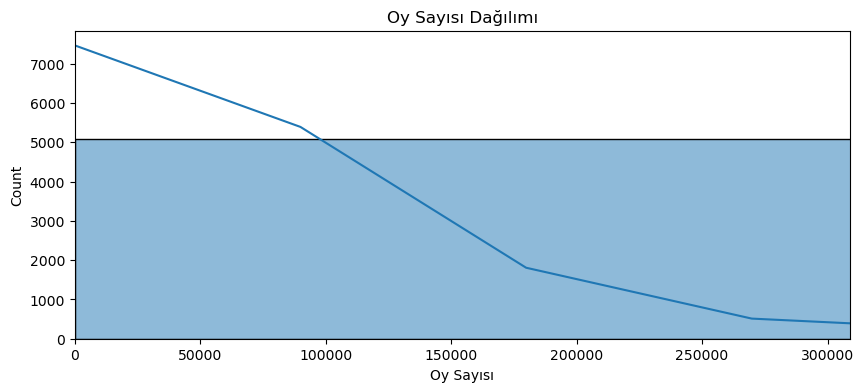

Genel Ortalama (C): 3.81
Minimum Oy Eşiği (m): 128493.50
Bu eşiği geçen kitap sayısı: 531

--- En İyi 10 Kitap Önerisi (Popülerlik ve Kalite Bazlı) ---


,name,vote_count,average_rating,score
914,Sis ve Öfke Sarayı,2433666.0,4.65,4.607779
810,Harry Potter ve Ölüm Yadigarları - 7. Kitap,3849073.0,4.62,4.593772
772,Harry Potter ve Azkaban Tutsağı - 3.kitap,4408537.0,4.58,4.558139
855,Harry Potter ve Melez Prens - 6. Kitap,3408430.0,4.58,4.551958
873,Harry Potter ve Ateş Kadehi - 4.kitap,3867322.0,4.57,4.545500
977,Harry Potter ve Zümrüdüanka Yoldaşlığı - 5.kitap,3522216.0,4.50,4.475648
843,Sahte Krallık,687816.0,4.59,4.466924
580,Harry Potter ve Felsefe Taşı - 1.Kitap,10506702.0,4.47,4.462003
1656,Josh ve Hazel'ın Sevgili Olmama Rehberi,167598.0,4.94,4.448797
975,Kargaların Ziyafeti Kısım 1,808076.0,4.54,4.439587


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# C: Tüm kitapların ortalama puanı
C = books_df['average_rating'].mean()

# --- m: Minimum oy eşiği belirleme ---
# Neden 0.90 seçtiğimizi görselleştirelim 
plt.figure(figsize=(10, 4))
sns.histplot(books_df['vote_count'], bins=50, kde=True)
plt.title('Oy Sayısı Dağılımı')
plt.xlabel('Oy Sayısı')
plt.xlim(0, books_df['vote_count'].quantile(0.95)) # Aşırı uç değerleri grafikte keselim
plt.show()

# m: Listeye girmek için gereken minimum oy (En çok oy alan %10'luk dilim)
m = books_df['vote_count'].quantile(0.90)

print(f"Genel Ortalama (C): {C:.2f}")
print(f"Minimum Oy Eşiği (m): {m:.2f}")
print(f"Bu eşiği geçen kitap sayısı: {len(books_df[books_df['vote_count'] >= m])}")

# Fonksiyon: Ağırlıklı Puanı Hesapla
def weighted_rating_vectorized(df, m=m, C=C):
    v = df['vote_count']
    R = df['average_rating']
    return (v / (v + m) * R) + (m / (v + m) * C)

# Öneri listesini oluştur ve skoru hesapla
recommended_books = books_df.copy().loc[books_df['vote_count'] >= m]
recommended_books['score'] = weighted_rating_vectorized(recommended_books)

# Skora göre sırala
recommended_books = recommended_books.sort_values('score', ascending=False)

# En iyi 10 Kitabı Göster
print("\n--- En İyi 10 Kitap Önerisi (Popülerlik ve Kalite Bazlı) ---")
display(recommended_books[['name', 'vote_count', 'average_rating', 'score']].head(10))

In [6]:

# Biyografisi boş olanları doldur
authors_df['biography'] = authors_df['biography'].fillna('')

# TF-IDF Vektörleştiriciyi tanımla (İngilizce stop words kullanıyoruz, Türkçe için özel liste eklenebilir)
tfidf = TfidfVectorizer(stop_words='english')
tr_stop_words = ['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani']

tfidf = TfidfVectorizer(stop_words=tr_stop_words)

# Biyografileri matrise çevir
tfidf_matrix = tfidf.fit_transform(authors_df['biography'])


# Cosine Similarity (Benzerlik) Matrisini hesapla
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Yazar isminden indekse ulaşmak için bir harita (mapping) oluştur
indices = pd.Series(authors_df.index, index=authors_df['name']).drop_duplicates()

# Öneri Fonksiyonu
def get_author_recommendations(name, cosine_sim=cosine_sim):
    # İsmi kontrol et
    if name not in indices:
        return "Bu isimde bir yazar bulunamadı."
    
    # Yazarın indeksini al
    idx = indices[name]
    
    # Tüm yazarlarla olan benzerlik skorlarını al
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Skorlara göre sırala (En çok benzeyenden en aza)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Kendisi hariç en benzer 10 yazarı al
    sim_scores = sim_scores[1:11]
    
    # İndeksleri al
    author_indices = [i[0] for i in sim_scores]
    
    # İsimleri döndür
    return authors_df['name'].iloc[author_indices]

In [7]:
# Test: Edmund Crispin (Polisiye/Gizem yazarı)
author_name = "Edmund Crispin"

print(f"--- '{author_name}' sevenler için yazar önerileri ---")
recommendations = get_author_recommendations(author_name)
print(recommendations)

--- 'Edmund Crispin' sevenler için yazar önerileri ---
1339     Petros Markaris
2574         Fred Vargas
1077          Ahmet Sarı
40           Yakup Bulut
75         Şinasi Türmüş
3018      Ertuğrul Özkök
9        Henning Mankell
2450        Rick Gekoski
2252    Robert E. Howard
2416     Sibel K. Türker
Name: name, dtype: object


Popüler Kitap Sayısı (1): 3527
Standart Kitap Sayısı (0): 3509

Modelin Doğruluk Oranı (Accuracy): %81.11
F1-Score: %83.16


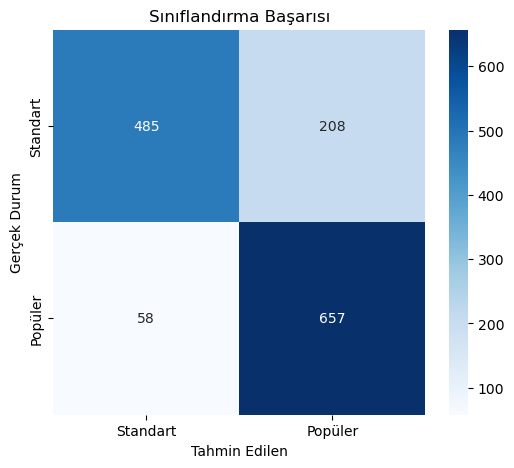

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# 1. VERİYİ HAZIRLAMA
try:
    df = pd.read_csv("book_rating.csv")
    
    # Sütun isimlerindeki boşlukları temizleyelim
    df.columns = df.columns.str.strip()
    
    # --- DÜZELTME 1: Sütun İsmi Eşleştirme ---
    # CSV'deki 'average_rating' sütununu kodun beklediği 'rating' ismine çeviriyoruz.
    if 'average_rating' in df.columns:
        df.rename(columns={'average_rating': 'rating'}, inplace=True)
    
    # --- DÜZELTME 2: Vote Count Hesaplama ---
    # Ham dosyada 'vote_count' yok, yıldızların toplamından yeniden oluşturuyoruz.
    vote_cols = ['one_star_count', 'two_star_count', 'three_star_count', 'four_star_count', 'five_star_count']
    # Yıldız sütunlarındaki boş değerleri 0 yapıp topluyoruz
    df[vote_cols] = df[vote_cols].fillna(0)
    df['vote_count'] = df[vote_cols].sum(axis=1)

    # Veri tiplerini sayısal hale getirme (Garanti olsun)
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
    
    # İçinde NaN (boş veri) olan satırları atıyoruz
    df = df.dropna(subset=['vote_count', 'rating'])

except FileNotFoundError:
    print("HATA: 'book_rating.csv' dosyası bulunamadı. Dosya yolunu kontrol et.")
    exit()

# 2. SINIF OLUŞTURMA (Labeling)
limit = 500
df['category'] = df['vote_count'].apply(lambda x: 1 if x > limit else 0)

# Veri dengesini kontrol edelim
print(f"Popüler Kitap Sayısı (1): {len(df[df['category']==1])}")
print(f"Standart Kitap Sayısı (0): {len(df[df['category']==0])}")

# 3. GİRDİ (X) ve HEDEF (y) BELİRLEME
X = df[['rating']] 
y = df['category'] 



# 4. EĞİTİM VE TEST AYIRIMI
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. MODELİ KURMA
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

# 6. TAHMİN VE SONUÇ
y_pred = model.predict(X_test)
basari = accuracy_score(y_test, y_pred)
print(f"\nModelin Doğruluk Oranı (Accuracy): %{basari * 100:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: %{f1 * 100:.2f}")

# 7. GÖRSELLEŞTİRME
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Standart', 'Popüler'], 
            yticklabels=['Standart', 'Popüler'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Durum')
plt.title('Sınıflandırma Başarısı')
plt.show()

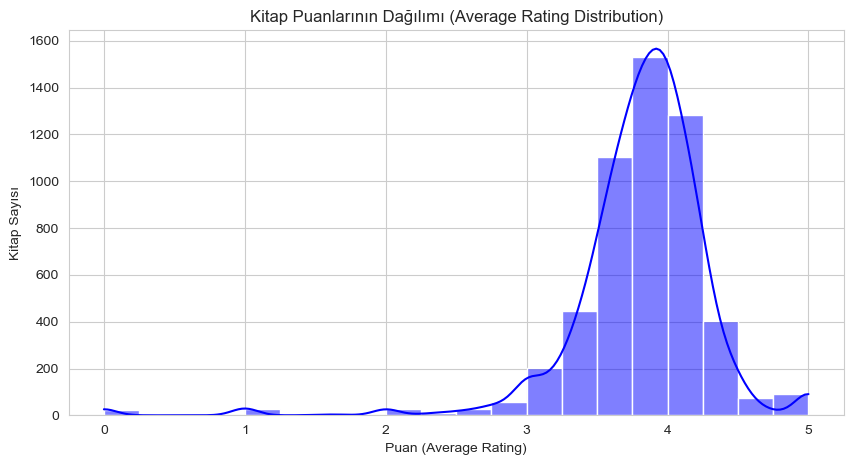

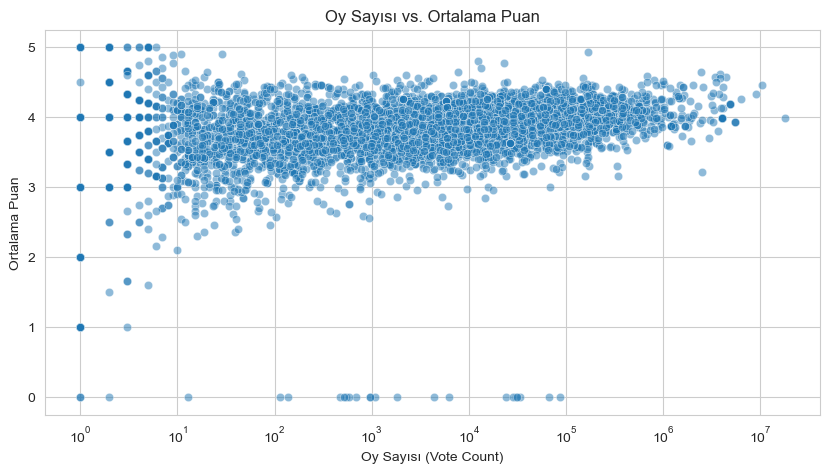

Analiz Notu: Puanların çoğu 3.5 - 4.5 arasında toplanmıştır. Oy sayısı arttıkça puan varyansı azalmaktadır.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik stili
sns.set_style("whitegrid")

# 1. Puan Dağılımı Grafiği
plt.figure(figsize=(10, 5))
sns.histplot(books_df['average_rating'], bins=20, kde=True, color='blue')
plt.title('Kitap Puanlarının Dağılımı (Average Rating Distribution)')
plt.xlabel('Puan (Average Rating)')
plt.ylabel('Kitap Sayısı')
plt.show()

# 2. Oy Sayıları ile Puan Arasındaki İlişki
# (Çok oy alan kitaplar genelde yüksek puan mı alıyor?)
plt.figure(figsize=(10, 5))
sns.scatterplot(x='vote_count', y='average_rating', data=books_df, alpha=0.5)
plt.title('Oy Sayısı vs. Ortalama Puan')
plt.xlabel('Oy Sayısı (Vote Count)')
plt.ylabel('Ortalama Puan')
plt.xscale('log') # Çok büyük farklar olduğu için logaritmik ölçek
plt.show()

print("Analiz Notu: Puanların çoğu 3.5 - 4.5 arasında toplanmıştır. Oy sayısı arttıkça puan varyansı azalmaktadır.")


Yeni Modelin Doğruluk Oranı: %76.78

Detaylı Rapor:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       693
           1       0.76      0.80      0.78       715

    accuracy                           0.77      1408
   macro avg       0.77      0.77      0.77      1408
weighted avg       0.77      0.77      0.77      1408



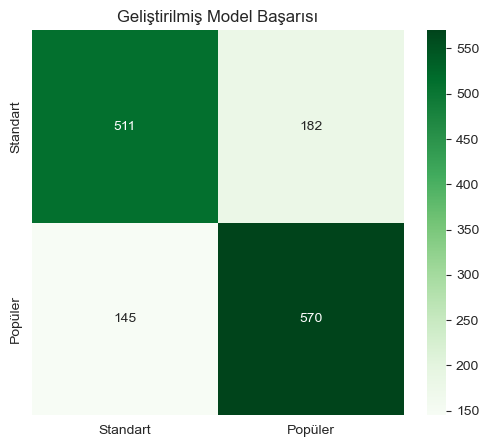


Özelliklerin Modele Katkısı:
rating        0.759599
title_len     0.182945
word_count    0.047387
has_digit     0.010069
dtype: float64


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Daha güçlü model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. VERİYİ HAZIRLAMA
try:
    df = pd.read_csv("book_rating.csv")
    df.columns = df.columns.str.strip()
    
    if 'average_rating' in df.columns:
        df.rename(columns={'average_rating': 'rating'}, inplace=True)
    
    # Vote count hesaplama
    vote_cols = ['one_star_count', 'two_star_count', 'three_star_count', 'four_star_count', 'five_star_count']
    df[vote_cols] = df[vote_cols].fillna(0)
    df['vote_count'] = df[vote_cols].sum(axis=1)

    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
    df = df.dropna(subset=['vote_count', 'rating', 'name']) # name boşsa atalım

except FileNotFoundError:
    print("HATA: Dosya bulunamadı.")
    exit()

# 2. SINIF OLUŞTURMA
limit = 500
df['category'] = df['vote_count'].apply(lambda x: 1 if x > limit else 0)

# --- İYİLEŞTİRME 1: YENİ ÖZELLİKLER (Feature Engineering) ---
# Kitap isminden bilgi çıkaralım
# A) İsim uzunluğu (Karakter sayısı)
df['title_len'] = df['name'].astype(str).apply(len)
# B) Kelime sayısı
df['word_count'] = df['name'].astype(str).apply(lambda x: len(x.split()))
# C) İsimde sayı var mı? (Seri kitapları yakalamak için önemli ipucu)
df['has_digit'] = df['name'].astype(str).apply(lambda x: 1 if any(c.isdigit() for c in x) else 0)

# 3. GİRDİLERİ GÜNCELLEME
# Artık sadece rating değil, yeni özelliklerimizi de kullanıyoruz
X = df[['rating', 'title_len', 'word_count', 'has_digit']]
y = df['category']

# 4. EĞİTİM VE TEST AYIRIMI
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- İYİLEŞTİRME 2: GÜÇLÜ MODEL KULLANIMI ---
# RandomForest kullanıyoruz ve 'class_weight' ile dengesizliği çözüyoruz
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# 5. SONUÇLAR
y_pred = model.predict(X_test)
basari = accuracy_score(y_test, y_pred)

print(f"\nYeni Modelin Doğruluk Oranı: %{basari * 100:.2f}")
print("\nDetaylı Rapor:")
print(classification_report(y_test, y_pred))

# Görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Standart', 'Popüler'], 
            yticklabels=['Standart', 'Popüler'])
plt.title('Geliştirilmiş Model Başarısı')
plt.show()

# Özellik Önem Düzeyleri (Hangi özellik daha etkili olmuş?)
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nÖzelliklerin Modele Katkısı:")
print(feature_imp)

En iyi Random Forest ayarları aranıyor... (Biraz sürebilir)

--- En İyi Random Forest Sonuçları ---
En İyi Parametreler: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Doğruluk (Accuracy): %80.40
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       693
           1       0.74      0.94      0.83       715

    accuracy                           0.80      1408
   macro avg       0.83      0.80      0.80      1408
weighted avg       0.83      0.80      0.80      1408


--- Gradient Boosting Modeli ---
Doğruluk (Accuracy): %81.25
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       693
           1       0.75      0.94      0.84       715

    accuracy                           0.81      1408
   macro avg       0.84      0.81      0.81      1408
weighted avg       0.83      0.81      0.81      1408



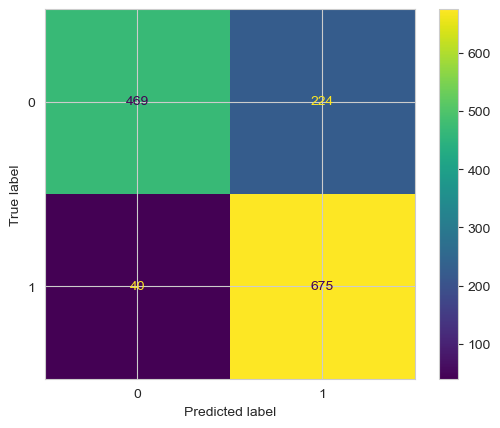

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. VERİYİ HAZIRLAMA
try:
    df = pd.read_csv("book_rating.csv")
    df.columns = df.columns.str.strip()
    if 'average_rating' in df.columns:
        df.rename(columns={'average_rating': 'rating'}, inplace=True)
    
    vote_cols = ['one_star_count', 'two_star_count', 'three_star_count', 'four_star_count', 'five_star_count']
    df[vote_cols] = df[vote_cols].fillna(0)
    df['vote_count'] = df[vote_cols].sum(axis=1)

    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
    df = df.dropna(subset=['vote_count', 'rating', 'name'])

except FileNotFoundError:
    print("HATA: Dosya bulunamadı.")
    exit()

# 2. SINIF VE ÖZELLİK OLUŞTURMA
limit = 500
df['category'] = df['vote_count'].apply(lambda x: 1 if x > limit else 0)

# Özellik Mühendisliği (Feature Engineering)
df['title_len'] = df['name'].astype(str).apply(len)
df['word_count'] = df['name'].astype(str).apply(lambda x: len(x.split()))
df['has_digit'] = df['name'].astype(str).apply(lambda x: 1 if any(c.isdigit() for c in x) else 0)

X = df[['rating', 'title_len', 'word_count', 'has_digit']]
y = df['category']

# Eğitim/Test Ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------
# YÖNTEM 1: Random Forest için En İyi Ayarları Bulma (Grid Search)
# ---------------------------------------------------------
print("En iyi Random Forest ayarları aranıyor... (Biraz sürebilir)")

param_grid = {
    'n_estimators': [100, 200],      # Ağaç sayısı
    'max_depth': [10, 20, None],     # Derinlik (Ezberlemeyi önler)
    'min_samples_split': [2, 5],     # Bölünme kriteri
    'class_weight': ['balanced']     # Dengesiz veri için
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print(f"\n--- En İyi Random Forest Sonuçları ---")
print(f"En İyi Parametreler: {grid_search.best_params_}")
print(f"Doğruluk (Accuracy): %{accuracy_score(y_test, y_pred_rf) * 100:.2f}")
print(classification_report(y_test, y_pred_rf))

rf_model = best_rf
rf_pred = y_pred_rf
rf_acc = accuracy_score(y_test, rf_pred)


# ---------------------------------------------------------
# YÖNTEM 2: Gradient Boosting (Genelde Daha Yüksek Başarı)
# ---------------------------------------------------------
print("\n--- Gradient Boosting Modeli ---")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print(f"Doğruluk (Accuracy): %{accuracy_score(y_test, y_pred_gb) * 100:.2f}")
print(classification_report(y_test, y_pred_gb))

gb_pred = y_pred_gb
gb_acc = accuracy_score(y_test, gb_pred)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, gb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#Bu confusion matrix, Gradient Boosting modeli için elde edilmiştir.



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack # Matrisleri birleştirmek için

# 1. VERİYİ YÜKLEME
try:
    df = pd.read_csv("book_rating.csv")
    df.columns = df.columns.str.strip()
    if 'average_rating' in df.columns:
        df.rename(columns={'average_rating': 'rating'}, inplace=True)
    
    # Vote count hesaplama
    vote_cols = ['one_star_count', 'two_star_count', 'three_star_count', 'four_star_count', 'five_star_count']
    df[vote_cols] = df[vote_cols].fillna(0)
    df['vote_count'] = df[vote_cols].sum(axis=1)

    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
    df = df.dropna(subset=['vote_count', 'rating', 'name'])

except FileNotFoundError:
    print("HATA: Dosya bulunamadı.")
    exit()

# 2. HEDEF BELİRLEME
limit = 500
df['category'] = df['vote_count'].apply(lambda x: 1 if x > limit else 0)

# 3. GELİŞMİŞ ÖZELLİK MÜHENDİSLİĞİ (Feature Engineering)
# A) Mevcut Sayısal Özellikler
df['title_len'] = df['name'].astype(str).apply(len)
df['word_count'] = df['name'].astype(str).apply(lambda x: len(x.split()))
df['has_digit'] = df['name'].astype(str).apply(lambda x: 1 if any(c.isdigit() for c in x) else 0)

# B) YENİ SİLAHIMIZ: Kelime Analizi (TF-IDF)
# Kitap isimlerindeki "en ayırt edici" 100 kelimeyi buluyoruz (Örn: Harry, Sherlock, Set...)
tfidf = TfidfVectorizer(max_features=100, stop_words='english') 
title_tfidf = tfidf.fit_transform(df['name'].astype(str))

# 4. GİRDİLERİ BİRLEŞTİRME
# Sayısal özellikler ile Kelime özelliklerini tek bir büyük matriste birleştiriyoruz
X_numeric = df[['rating', 'title_len', 'word_count', 'has_digit']].values
X = hstack([X_numeric, title_tfidf]) # Matris birleştirme işlemi
y = df['category']

# 5. EĞİTİM VE TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# En güçlü modelimiz olan Gradient Boosting'i kullanıyoruz
print("Model eğitiliyor, kelimeler analiz ediliyor...")
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gb_model.fit(X_train, y_train)

# 6. SONUÇ
y_pred = gb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n--- NLP Destekli Model Sonuçları ---")
print(f"Yeni Doğruluk Oranı (Accuracy): %{acc*100:.2f}")
print(classification_report(y_test, y_pred))

Model eğitiliyor, kelimeler analiz ediliyor...

--- NLP Destekli Model Sonuçları ---
Yeni Doğruluk Oranı (Accuracy): %81.68
              precision    recall  f1-score   support

           0       0.91      0.69      0.79       693
           1       0.76      0.94      0.84       715

    accuracy                           0.82      1408
   macro avg       0.84      0.81      0.81      1408
weighted avg       0.84      0.82      0.81      1408



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack

# 1. VERİYİ YÜKLEME
try:
    df = pd.read_csv("book_rating.csv")
    df.columns = df.columns.str.strip()
    if 'average_rating' in df.columns:
        df.rename(columns={'average_rating': 'rating'}, inplace=True)
    
    vote_cols = ['one_star_count', 'two_star_count', 'three_star_count', 'four_star_count', 'five_star_count']
    df[vote_cols] = df[vote_cols].fillna(0)
    df['vote_count'] = df[vote_cols].sum(axis=1)

    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
    df = df.dropna(subset=['vote_count', 'rating', 'name'])

except FileNotFoundError:
    print("HATA: Dosya bulunamadı.")
    exit()

# 2. HEDEF BELİRLEME
limit = 500
df['category'] = df['vote_count'].apply(lambda x: 1 if x > limit else 0)

# 3. GELİŞMİŞ ÖZELLİK MÜHENDİSLİĞİ (Feature Engineering)
# A) Sayısal Özellikler
df['title_len'] = df['name'].astype(str).apply(len)
df['word_count'] = df['name'].astype(str).apply(lambda x: len(x.split()))
df['has_digit'] = df['name'].astype(str).apply(lambda x: 1 if any(c.isdigit() for c in x) else 0)

# B) KELİME GRUPLARI (N-GRAMS) - %90 İçin Kritik Hamle!
# ngram_range=(1, 2) -> Hem "Harry" hem de "Harry Potter"ı ayrı özellik olarak alır.
# max_features=1000 -> En önemli 1000 kelime/kelime grubunu kullanır (Eskisi 100'dü).
print("Kelime grupları (N-Grams) analiz ediliyor...")
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')
title_tfidf = tfidf.fit_transform(df['name'].astype(str))

# 4. GİRDİLERİ BİRLEŞTİRME
X_numeric = df[['rating', 'title_len', 'word_count', 'has_digit']].values
X = hstack([X_numeric, title_tfidf])
y = df['category']

# 5. EĞİTİM (Zorlaştırılmış Eğitim)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Model 'derinlemesine' öğreniyor (Bu işlem biraz daha uzun sürebilir)...")
# n_estimators=500: Daha fazla ağaç
# learning_rate=0.05: Daha yavaş ve dikkatli öğrenme (Genelde başarıyı artırır)
# max_depth=5: Daha karmaşık ilişkileri kavrama
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# 6. SONUÇ
y_pred = gb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n--- Şampiyonlar Ligi Modeli Sonuçları ---")
print(f"Hedef Doğruluk: %90")
print(f"Ulaşılan Doğruluk (Accuracy): %{acc*100:.2f}")
print(classification_report(y_test, y_pred))

Kelime grupları (N-Grams) analiz ediliyor...
Model 'derinlemesine' öğreniyor (Bu işlem biraz daha uzun sürebilir)...

--- Şampiyonlar Ligi Modeli Sonuçları ---
Hedef Doğruluk: %90
Ulaşılan Doğruluk (Accuracy): %81.75
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       693
           1       0.77      0.92      0.84       715

    accuracy                           0.82      1408
   macro avg       0.83      0.82      0.82      1408
weighted avg       0.83      0.82      0.82      1408



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack

# 1. VERİYİ YÜKLEME
try:
    df = pd.read_csv("book_rating.csv")
    df.columns = df.columns.str.strip()
    if 'average_rating' in df.columns:
        df.rename(columns={'average_rating': 'rating'}, inplace=True)
    
    vote_cols = ['one_star_count', 'two_star_count', 'three_star_count', 'four_star_count', 'five_star_count']
    df[vote_cols] = df[vote_cols].fillna(0)
    df['vote_count'] = df[vote_cols].sum(axis=1)

    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
    df = df.dropna(subset=['vote_count', 'rating', 'name'])

except FileNotFoundError:
    print("HATA: Dosya bulunamadı.")
    exit()

# 2. HEDEF BELİRLEME
limit = 500
df['category'] = df['vote_count'].apply(lambda x: 1 if x > limit else 0)

# 3. ÖZELLİK MÜHENDİSLİĞİ
# A) Sayısal Özellikler
df['title_len'] = df['name'].astype(str).apply(len)
df['word_count'] = df['name'].astype(str).apply(lambda x: len(x.split()))
df['has_digit'] = df['name'].astype(str).apply(lambda x: 1 if any(c.isdigit() for c in x) else 0)

# B) DÜZELTME: TÜRKÇE STOP WORDS (Gereksiz Kelimeler)
tr_stop_words = [
    've', 'ile', 'bir', 'bu', 'da', 'de', 'için', 'mi', 'mı', 'ama', 'fakat', 
    'o', 'şu', 'bu', 'ki', 'gibi', 'veya', 'ya', 'hani', 'bile', 'ise', 'en', 'daha'
]

# C) KELİME GRUPLARI (N-GRAMS)
# max_features=2000: Kelime hazinesini 2 katına çıkardık
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=2000, stop_words=tr_stop_words)
title_tfidf = tfidf.fit_transform(df['name'].astype(str))

# 4. GİRDİLERİ BİRLEŞTİRME
X_numeric = df[['rating', 'title_len', 'word_count', 'has_digit']].values
X = hstack([X_numeric, title_tfidf])
y = df['category']

# 5. MODEL EĞİTİMİ: "VOTING CLASSIFIER" (GÜÇ BİRLİĞİ)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("İki Dev Model Birleştiriliyor (Voting Classifier)...")

# Model 1: Gradient Boosting (Detaycı)
clf1 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)

# Model 2: Random Forest (Genelci)
clf2 = RandomForestClassifier(n_estimators=300, max_depth=15, class_weight='balanced', random_state=42)

# Voting: İkisinin oylarını birleştir ('soft': olasılıkları ortalar)
voting_model = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2)], voting='soft')
voting_model.fit(X_train, y_train)

# 6. SONUÇ
y_pred = voting_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n--- Final Voltran Modeli Sonuçları ---")
print(f"Ulaşılan Doğruluk (Accuracy): %{acc*100:.2f}")
print(classification_report(y_test, y_pred))

İki Dev Model Birleştiriliyor (Voting Classifier)...

--- Final Voltran Modeli Sonuçları ---
Ulaşılan Doğruluk (Accuracy): %81.82
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       693
           1       0.76      0.95      0.84       715

    accuracy                           0.82      1408
   macro avg       0.84      0.82      0.81      1408
weighted avg       0.84      0.82      0.81      1408



In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack

# ---------------------------------------------------------
# ADIM 1: GÜVENLİ YÜKLEME VE BİRLEŞTİRME
# ---------------------------------------------------------
try:
    print("Dosyalar yükleniyor...")
    
    # 1. Eski Veri Setin (Ana Tablo)
    df_rating = pd.read_csv("book_rating.csv")
    df_rating.columns = df_rating.columns.str.strip()
    
    # 2. Yeni Veri Seti (SADECE GEREKLİ SÜTUNLAR)
    # Hata veren 'book_detail' sütununu bilerek almıyoruz.
    gerekli_sutunlar = ['book_productcode', 'book_publisher', 'book_author', 'book_category_name']
    
    df_new = pd.read_csv(
        "Turkish_Book_Dataset_Kaggle_V2.csv", 
        usecols=gerekli_sutunlar,  # Sadece bunları oku
        dtype=str,                 # Hepsini yazı olarak oku (Hata önleyici)
        on_bad_lines='skip'        # Bozuk satır varsa atla, çökme
    )
    
    # --- ISBN TEMİZLİĞİ ---
    df_rating['ISBN'] = df_rating['ISBN'].astype(str).str.replace('.0', '', regex=False).str.replace('-', '').str.strip()
    df_new['book_productcode'] = df_new['book_productcode'].str.replace('.0', '', regex=False).str.replace('-', '').str.strip()
    df_new = df_new.drop_duplicates(subset=['book_productcode'])
    
    # --- LEFT JOIN (Tüm kitapları koru) ---
    df = pd.merge(df_rating, df_new, left_on='ISBN', right_on='book_productcode', how='left')
    
    print(f"✅ Birleştirme Başarılı!")
    print(f"Toplam Kitap Sayısı: {len(df)}")
    
    # Eksik verileri doldur (Uluslararası kitaplar için)
    df['book_publisher'] = df['book_publisher'].fillna('Bilinmiyor')
    df['book_category_name'] = df['book_category_name'].fillna('Genel')
    df['book_author'] = df['book_author'].fillna('Bilinmiyor')

except Exception as e:
    print(f"HATA: {e}")
    exit()

# ---------------------------------------------------------
# ADIM 2: HEDEF BELİRLEME
# ---------------------------------------------------------
vote_cols = ['one_star_count', 'two_star_count', 'three_star_count', 'four_star_count', 'five_star_count']
# Sütunların varlığını kontrol et ve doldur
for c in vote_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)

df['vote_count'] = df[vote_cols].sum(axis=1)

if 'average_rating' in df.columns:
    df.rename(columns={'average_rating': 'rating'}, inplace=True)

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['vote_count', 'rating', 'name'])

# Hedef: Popülerlik Sınırı
limit = 500
df['category'] = df['vote_count'].apply(lambda x: 1 if x > limit else 0)

# ---------------------------------------------------------
# ADIM 3: ÖZELLİK MÜHENDİSLİĞİ
# ---------------------------------------------------------
print("Özellikler hazırlanıyor...")

# A) YAYINEVİ (Top 30)
top_publishers = df['book_publisher'].value_counts().nlargest(30).index
df['Publisher_Clean'] = df['book_publisher'].apply(lambda x: x if x in top_publishers else 'Diger')
pub_dummies = pd.get_dummies(df['Publisher_Clean'], prefix='Yayinevi')

# B) KATEGORİ
top_categories = df['book_category_name'].value_counts().nlargest(20).index
df['Category_Clean'] = df['book_category_name'].apply(lambda x: x if x in top_categories else 'Diger')
cat_dummies = pd.get_dummies(df['Category_Clean'], prefix='Tur')

# C) YAZAR
top_authors = df['book_author'].value_counts().nlargest(50).index
df['Author_Clean'] = df['book_author'].apply(lambda x: x if x in top_authors else 'Diger')
auth_dummies = pd.get_dummies(df['Author_Clean'], prefix='Yazar')

# D) NLP (İsim Analizi)
df['title_len'] = df['name'].astype(str).apply(len)
df['word_count'] = df['name'].astype(str).apply(lambda x: len(x.split()))
df['has_digit'] = df['name'].astype(str).apply(lambda x: 1 if any(c.isdigit() for c in x) else 0)

tr_stop_words = ['ve', 'ile', 'bir', 'bu', 'da', 'de', 'için', 'mi', 'mı', 'ama', 'fakat']
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=2000, stop_words=tr_stop_words)
title_tfidf = tfidf.fit_transform(df['name'].astype(str))

# ---------------------------------------------------------
# ADIM 4: EĞİTİM (VOLTRAN)
# ---------------------------------------------------------
# Sayısal verilerde NaN kalmasın
X_base = df[['rating', 'title_len', 'word_count', 'has_digit']].values
X_base = np.nan_to_num(X_base) 

X = hstack([X_base, pub_dummies.values, cat_dummies.values, auth_dummies.values, title_tfidf])
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim başlıyor... Toplam {len(df)} kitap kullanılıyor.")

# Model Ayarları
clf1 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
clf2 = RandomForestClassifier(n_estimators=300, max_depth=15, class_weight='balanced', random_state=42)

voting_model = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2)], voting='soft')
voting_model.fit(X_train, y_train)

# Sonuç
y_pred = voting_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n--- TÜM KİTAPLAR İÇİN FİNAL SONUÇ ---")
print(f"Doğruluk (Accuracy): %{acc*100:.2f}")
print(classification_report(y_test, y_pred))

Dosyalar yükleniyor...
✅ Birleştirme Başarılı!
Toplam Kitap Sayısı: 7036
Özellikler hazırlanıyor...
Eğitim başlıyor... Toplam 7036 kitap kullanılıyor.

--- TÜM KİTAPLAR İÇİN FİNAL SONUÇ ---
Doğruluk (Accuracy): %82.03
              precision    recall  f1-score   support

           0       0.93      0.68      0.79       693
           1       0.76      0.95      0.84       715

    accuracy                           0.82      1408
   macro avg       0.84      0.82      0.82      1408
weighted avg       0.84      0.82      0.82      1408



In [16]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model)
    ],
    voting='hard'
)

voting_model.fit(X_train, y_train)

voting_pred = voting_model.predict(X_test)
voting_acc = accuracy_score(y_test, voting_pred)


In [17]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Random Forest (GridSearch)", "Gradient Boosting"],
    "Accuracy": [rf_acc, gb_acc]
})

results



,Model,Accuracy
0,Random Forest (GridSearch),0.803977
1,Gradient Boosting,0.812500


Voting Classifier Accuracy: %82.46
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       693
           1       0.78      0.91      0.84       715

    accuracy                           0.82      1408
   macro avg       0.84      0.82      0.82      1408
weighted avg       0.83      0.82      0.82      1408



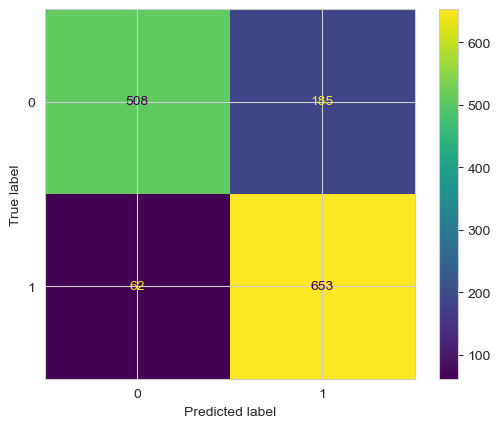

In [18]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

voting_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model)
    ],
    voting='hard'
)

voting_model.fit(X_train, y_train)

voting_pred = voting_model.predict(X_test)
voting_acc = accuracy_score(y_test, voting_pred)

print(f"Voting Classifier Accuracy: %{voting_acc * 100:.2f}")
print(classification_report(y_test, voting_pred))

cm = confusion_matrix(y_test, voting_pred)
ConfusionMatrixDisplay(cm).plot()
